##### Import the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

##### Load the dataset

In [52]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [53]:
x_train.shape

(60000, 28, 28)

In [54]:
x_test.shape

(10000, 28, 28)

##### Explore the images

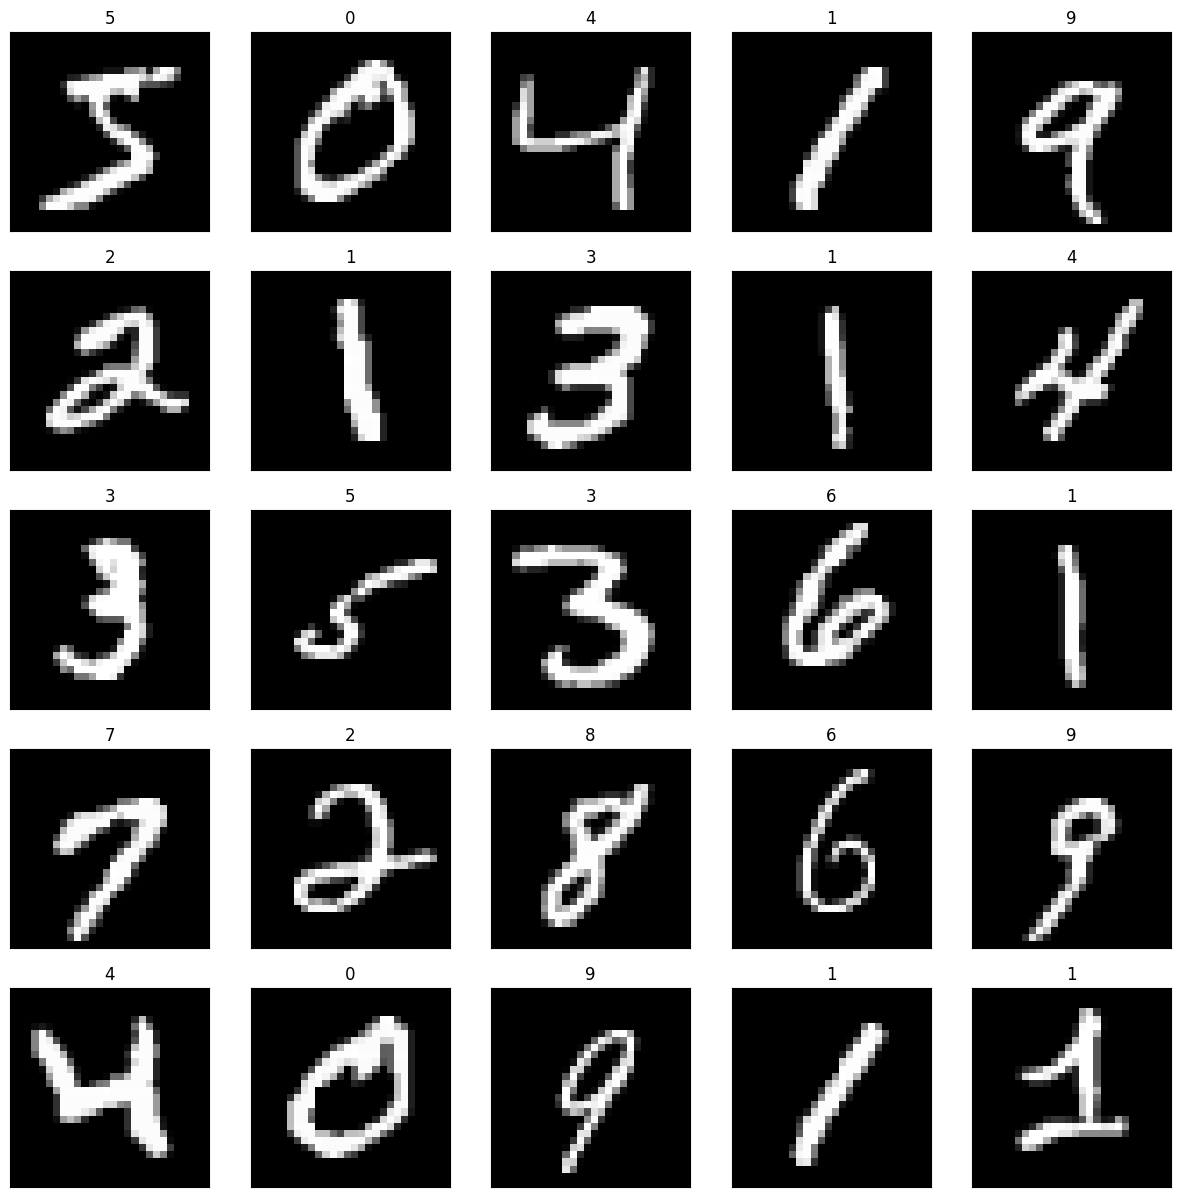

In [55]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap ='gray')
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])

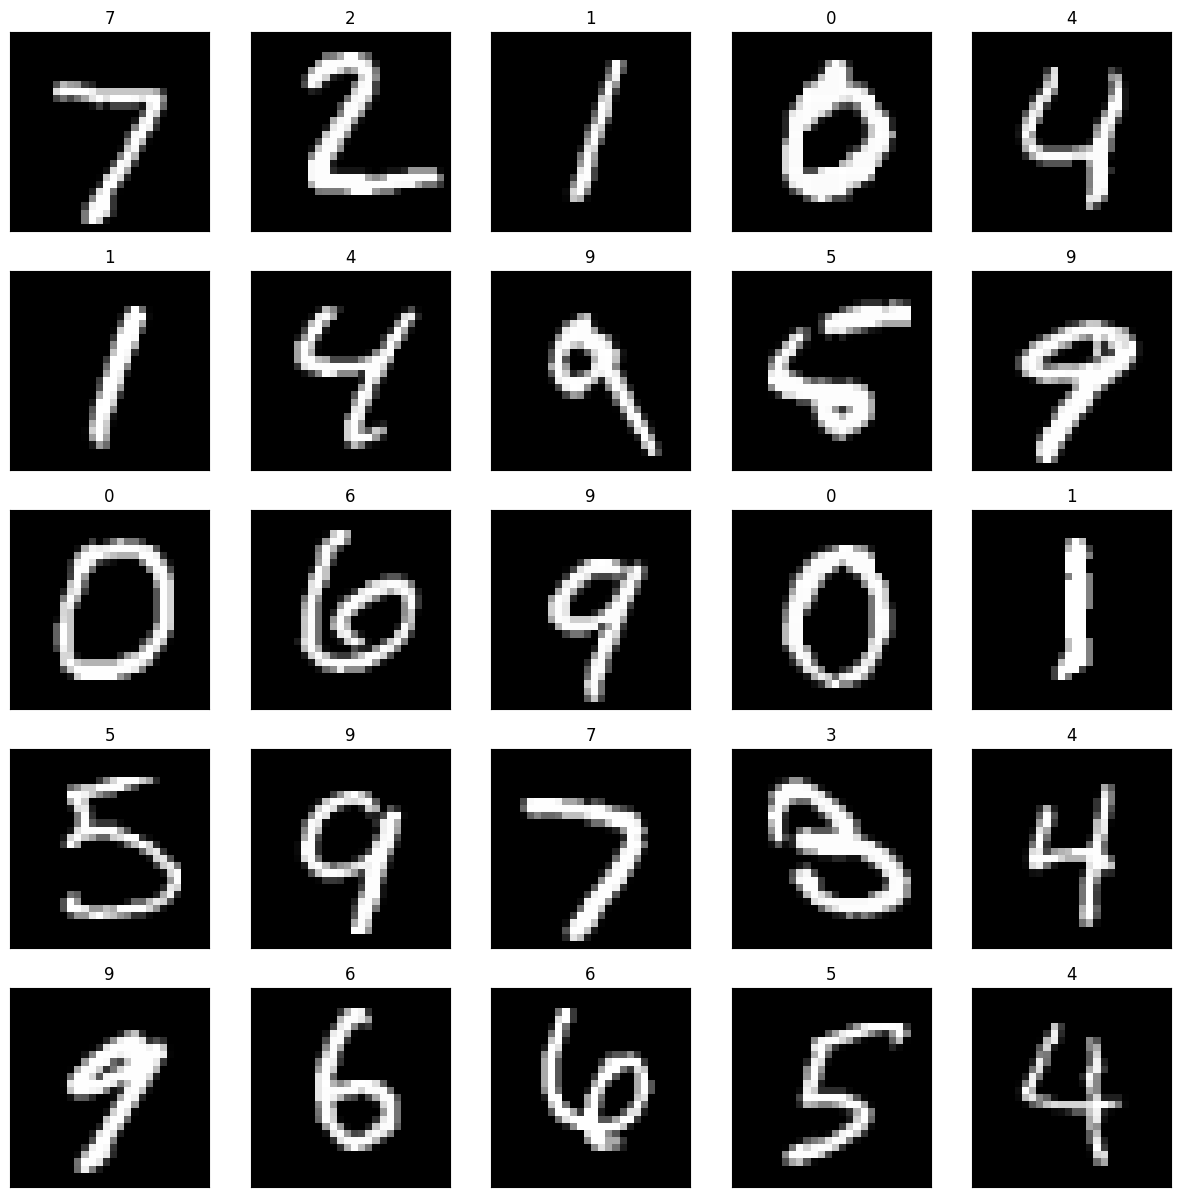

In [56]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i], cmap ='gray')
    plt.title(y_test[i])
    plt.xticks([])
    plt.yticks([])

##### Data Preparation

In [57]:
# normalize
x_train = x_train / 255
x_test = x_test / 255

In [58]:
x_train.shape

(60000, 28, 28)

In [59]:
x_test.shape

(10000, 28, 28)

##### Prepare the output variable

In [60]:
import seaborn as sns

<Axes: xlabel='count'>

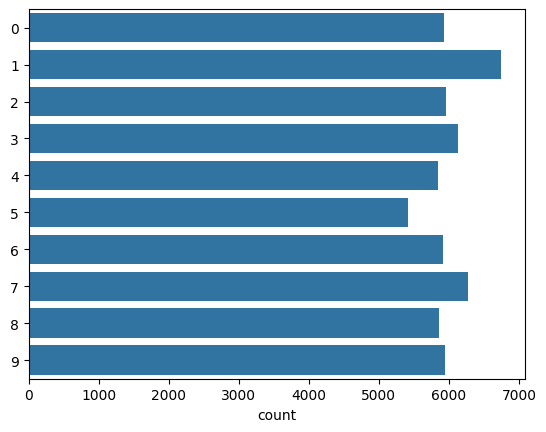

In [61]:
sns.countplot(y = y_train)

In [62]:
y_train.shape

(60000,)

In [63]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [64]:
y_train_new.shape

(60000, 10)

In [65]:
y_test_new.shape

(10000, 10)

In [66]:
y_train_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [67]:
x_train.shape, y_train_new.shape

((60000, 28, 28), (60000, 10))

In [68]:
x_test.shape, y_test_new.shape

((10000, 28, 28), (10000, 10))

##### Build the model

In [69]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

In [70]:
model = Sequential()

# input layer
model.add(Input(shape=(28,28,1)))

# convolution and pooling layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

# Hidden layers
model.add(Dense(128, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

In [71]:
from tensorflow.keras.utils import plot_model

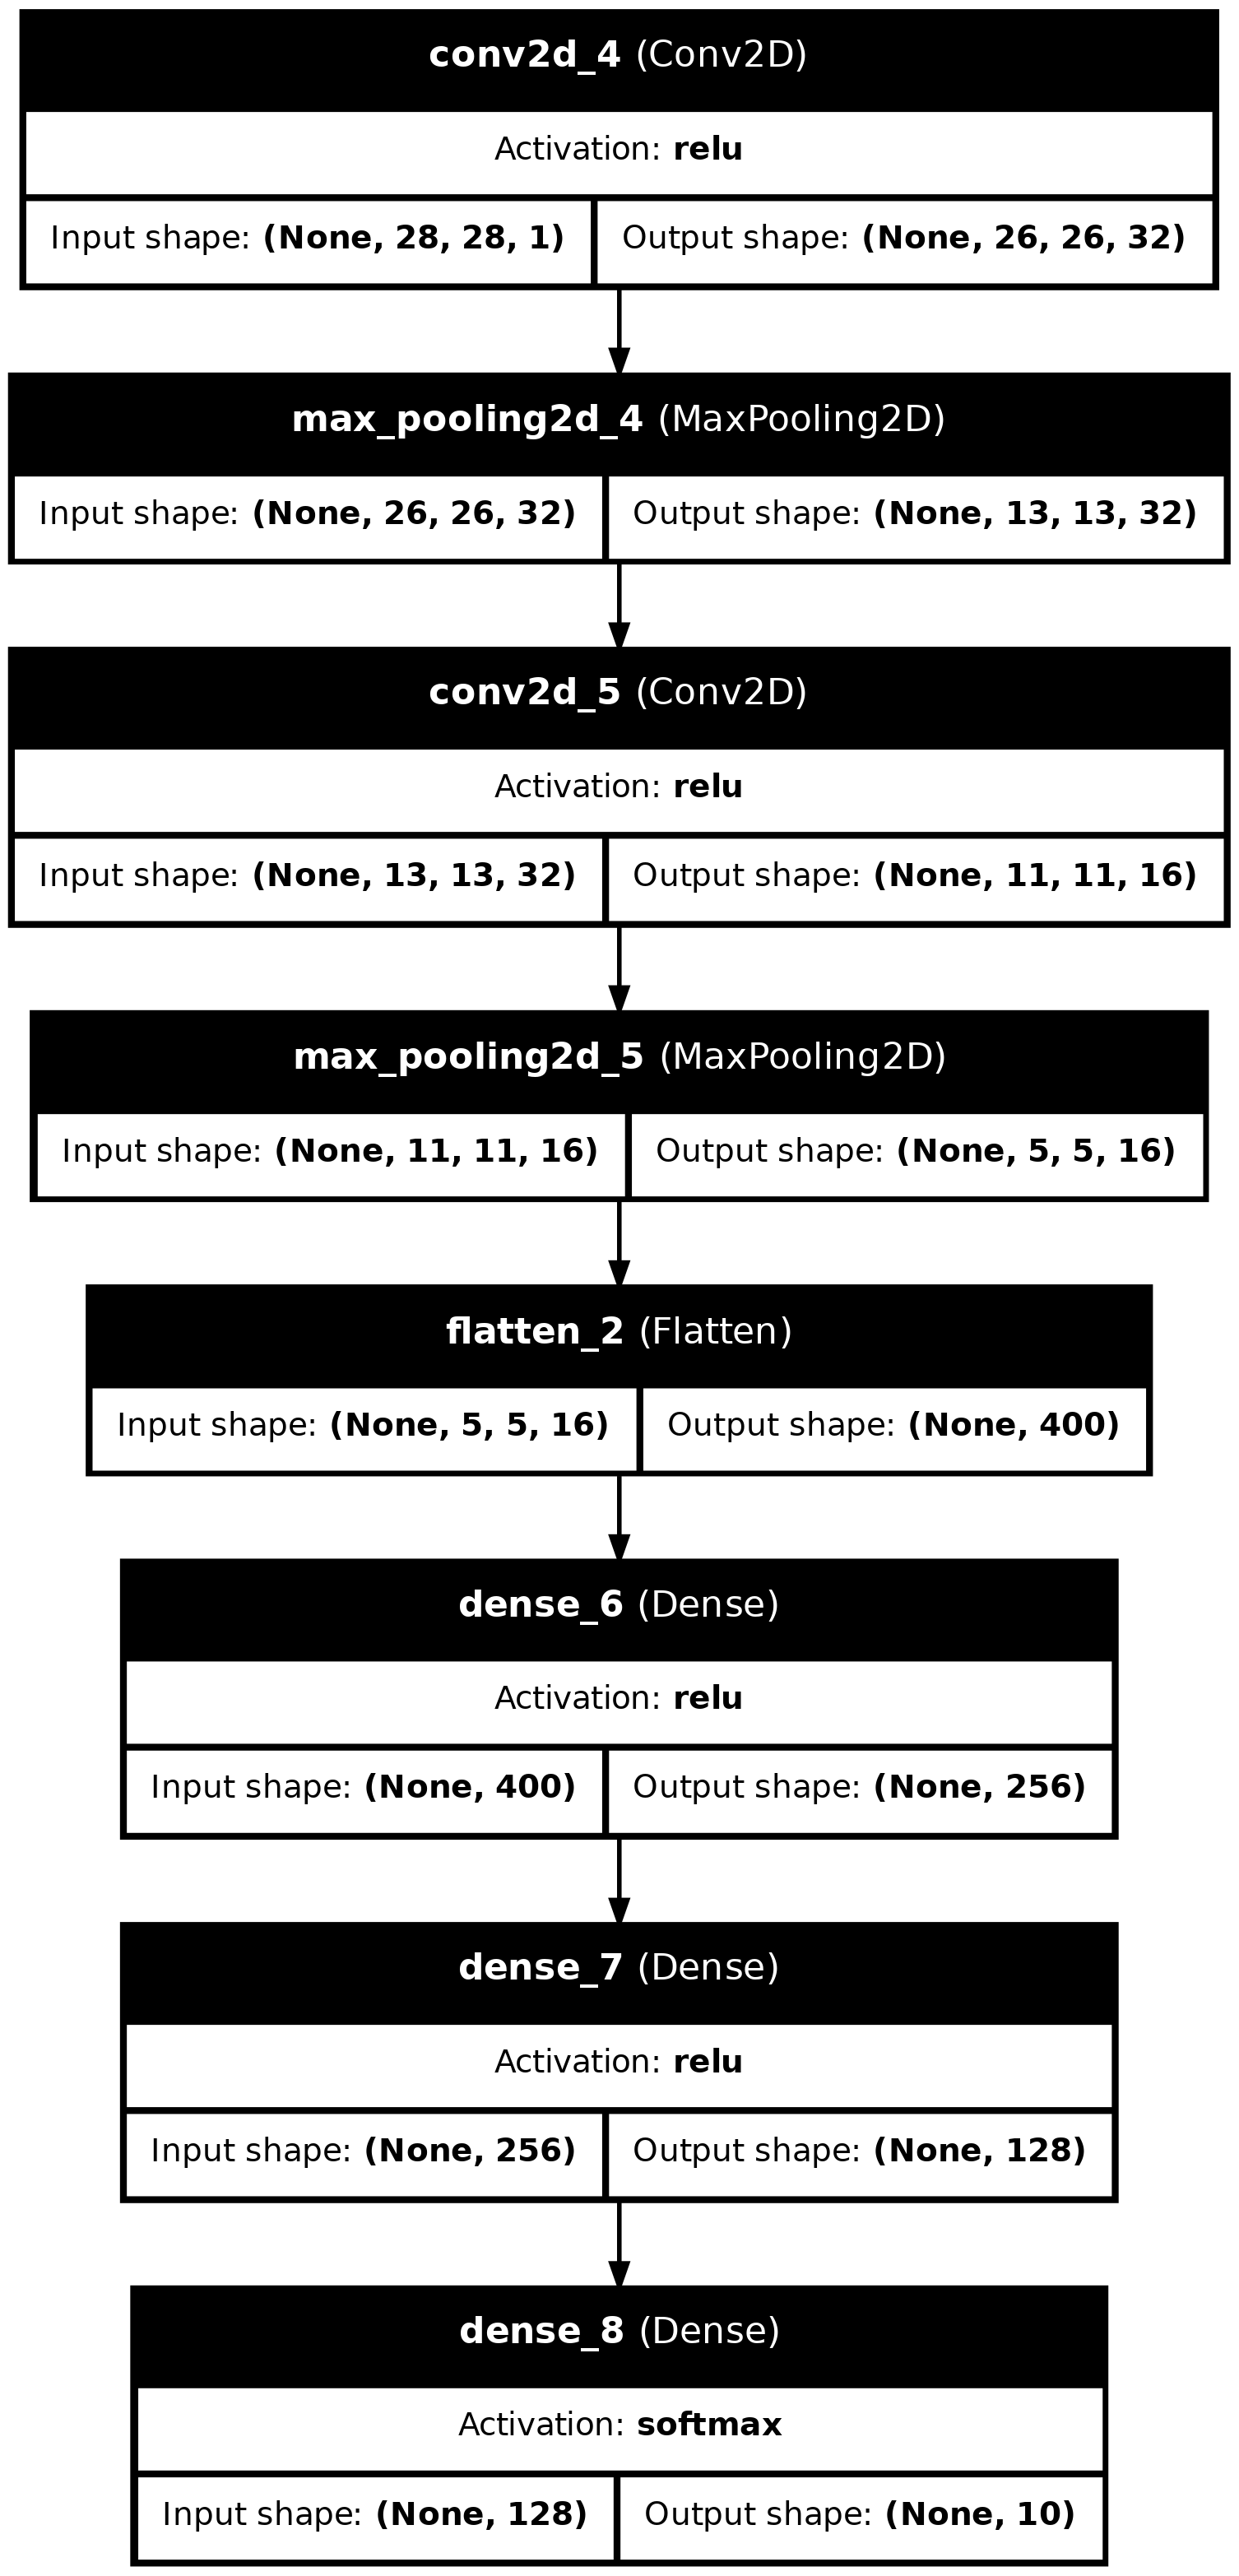

In [72]:
plot_model(model, show_layer_activations=True, show_shapes=True,
          show_layer_names=True)

In [73]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       102,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141,786 (553.85 KB)

 Trainable params: 141,786 (553.85 KB)

 Non-trainable params: 0 (0.00 B)

##### Compile the model

In [76]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

##### Train the model

In [77]:
history = model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9840 - loss: 0.0535
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9884 - loss: 0.0363
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9922 - loss: 0.0261
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9936 - loss: 0.0210
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9942 - loss: 0.0191
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9947 - loss: 0.0183
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9953 - loss: 0.0154
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.9959 - loss: 0.0130
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.9963 - loss: 0.0141
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9974 - loss: 0.0110


##### Evaluate the model

In [79]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9851 - loss: 0.0718


[0.05156872048974037, 0.9897000193595886]

In [80]:
(x_tr, y_tr), (x_te, y_te) = mnist.load_data()

8


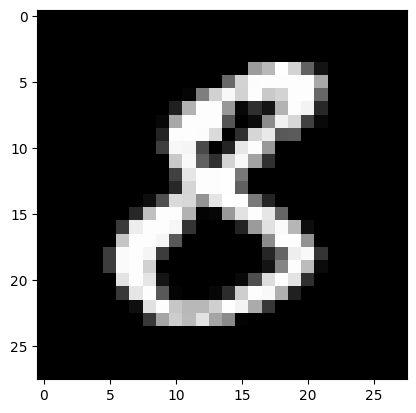

In [82]:
new = x_te[1234]
plt.imshow(new, cmap='gray')
new = new / 255
new = new.reshape(1,28,28)
probs = model.predict(new, verbose=False)
print(probs.argmax())

In [83]:
probs

array([[5.24827404e-12, 2.76837993e-12, 1.83128517e-08, 4.13408543e-06,
        1.42995153e-12, 6.47735448e-08, 1.61171129e-11, 1.12174775e-13,
        9.99995828e-01, 4.73981271e-11]], dtype=float32)

##### Prediction on unknown data

In [38]:
# Download the new-char.png file from 
# https://mitu.co.in/dataset  ---> images folder
# Predict the letter present in it

In [84]:
import cv2

In [85]:
img = cv2.imread('images/new-char.png',0)

In [86]:
img_new = cv2.resize(img, (28,28))

In [87]:
new = img_new.reshape(1,28,28)
new = new / 255
probs = model.predict(new, verbose=False)
print(probs.argmax())

2


In [88]:
img = cv2.imread('images/new-char1.jpg',0)

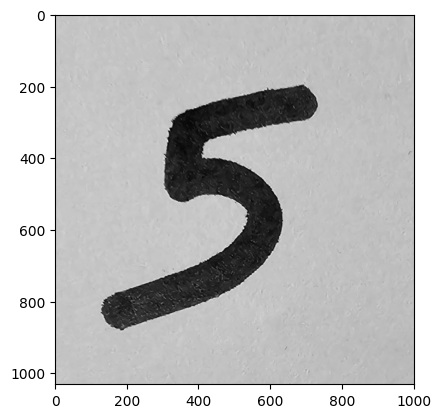

In [89]:
plt.imshow(img, cmap = 'gray')

In [90]:
thresh, img_thresh = cv2.threshold(img, 100,255, cv2.THRESH_BINARY_INV)

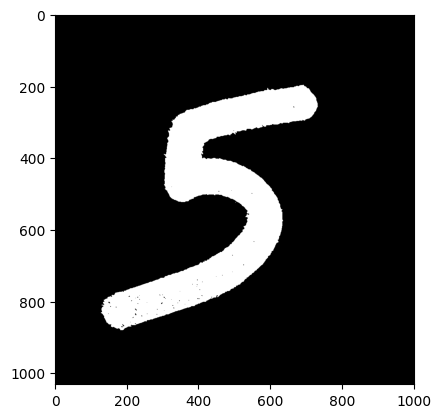

In [110]:
plt.imshow(img_thresh, cmap = 'gray')

In [91]:
img_new = cv2.resize(img_thresh, (28,28))

In [92]:
new = img_new.reshape(1,28,28)
new = new / 255
probs = model.predict(new, verbose=False)
print(probs.argmax())

5
